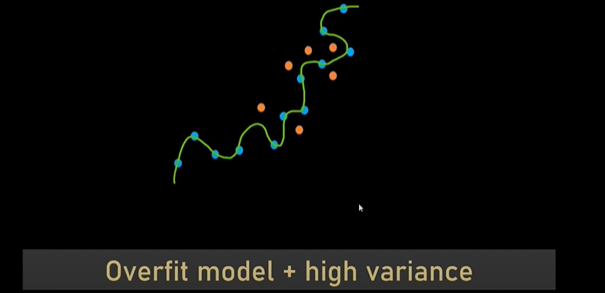

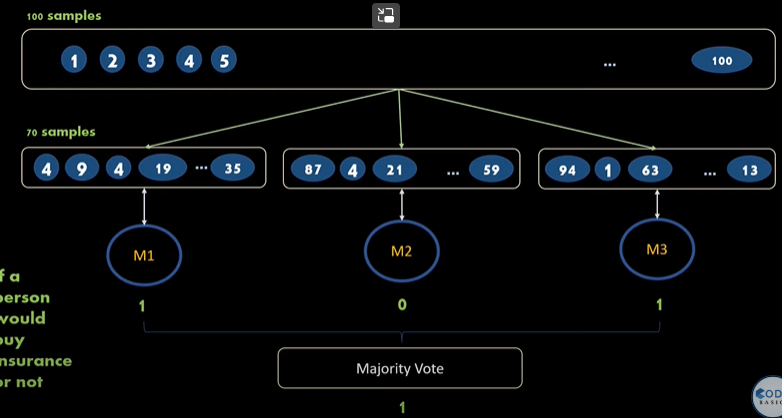

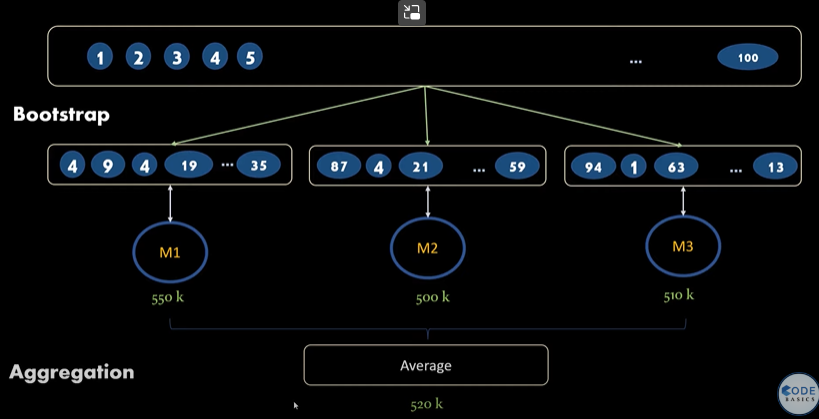

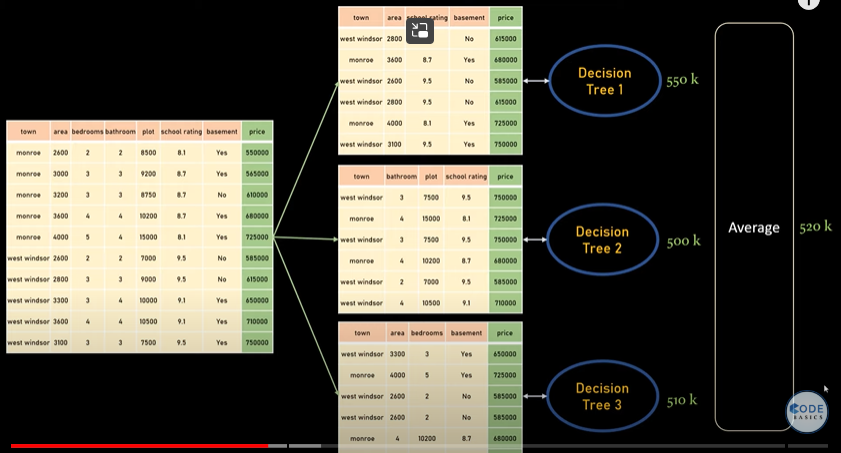

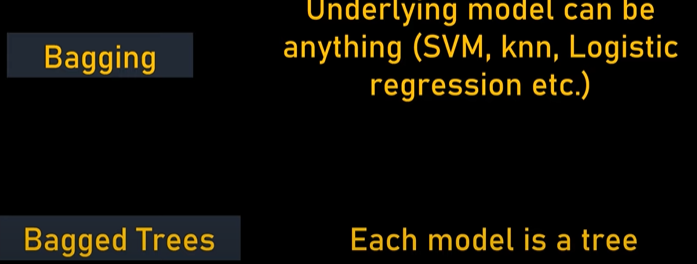

Ensemble Learning: Bagging Tutorial
We will use pima indian diabetes dataset to predict if a person has a diabetes or not based on certain features such as blood pressure, skin thickness, age etc. We will train a standalone model first and then use bagging ensemble technique to check how it can improve the performance of the model

In [1]:
import pandas as pd

In [24]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,30,0,0,28.1,0.167,21,0
4,0,137,40,35,192,43.1,2.288,33,1


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4.085714,131.485714,64.742857,14.714286,44.800000,31.611429,0.559343,41.828571,0.628571
std,2.873524,29.298034,15.393549,18.554485,77.688973,4.829369,0.468660,11.944690,0.490241
min,0.000000,73.000000,30.000000,0.000000,0.000000,23.300000,0.143000,21.000000,0.000000
25%,2.000000,114.500000,65.000000,0.000000,0.000000,28.300000,0.272500,32.500000,0.000000
50%,3.000000,133.000000,70.000000,0.000000,0.000000,30.800000,0.495000,43.000000,1.000000
75%,6.000000,150.000000,74.000000,35.000000,80.000000,34.250000,0.649500,50.500000,1.000000
max,10.000000,183.000000,80.000000,43.000000,192.000000,43.100000,2.288000,62.000000,1.000000


In [27]:
df.Class.value_counts()

Class
1    22
0    13
Name: count, dtype: int64

In [32]:
X = df.drop('Class',axis=1)

In [37]:
y = df.Class

In [38]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,30,0,0,28.1,0.167,21
4,0,137,40,35,192,43.1,2.288,33
5,2,159,76,0,0,25.4,0.476,45
6,5,116,74,0,0,34.4,0.529,37
7,3,118,80,0,0,32.0,0.193,48
8,10,171,66,43,160,36.1,0.674,59
9,2,107,74,0,0,38.5,0.477,45


In [39]:
y

0     1
1     0
2     1
3     0
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    0
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    0
27    1
28    1
29    1
30    0
31    1
32    1
33    0
34    1
Name: Class, dtype: int64

There is slight imbalance in our dataset but since it is not major we will not worry about it!

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# # Create RandomOverSampler object
# ros = RandomOverSampler(random_state=42)

# # Fit and transform data
# X_res, y_res = ros.fit_resample(X, y)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Create RandomUnderSampler object
# rus = RandomUnderSampler(random_state=42)

# # Fit and transform data
# X_res, y_res = rus.fit_resample(X, y)

In [40]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform data
X_res, y_res = smote.fit_resample(X, y)

In [44]:
y_res.value_counts()

Class
1    22
0    22
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [48]:
X_scaled = scaler.fit_transform(X_res)

In [50]:
X_scaled[:5]

array([[ 0.87348708,  0.77982107,  0.55359032,  1.32505396, -0.50445813,
         0.52786139,  0.30033677,  0.89263787],
       [-0.97427405, -1.34570893,  0.16797596,  0.97558918, -0.50445813,
        -1.06521343, -0.3404583 , -0.71564933],
       [ 1.61259154,  1.96067108,  0.03943783, -0.7134906 , -0.50445813,
        -1.81623442,  0.40481423, -0.63100263],
       [-0.97427405, -1.21075465, -2.14571025, -0.7134906 , -0.50445813,
        -0.72384026, -0.76765501, -1.56211627],
       [-1.34382628,  0.40869679, -1.50301964,  1.32505396,  2.21343874,
         2.68989151,  4.15671581, -0.54635594]])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res,random_state=10) # dataset remain same for train and test data

# if data is not balanced you can user strtify=y as argument in train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, stratify=y, random_state=10)

In [60]:

X_train.shape

(33, 8)

In [61]:

X_test.shape

(11, 8)

In [62]:

y_train.value_counts()

Class
0    17
1    16
Name: count, dtype: int64

In [63]:
y_test.value_counts()

Class
1    6
0    5
Name: count, dtype: int64

Train using stand alone model

In [64]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

Cross-Validation:
Cross-validation is a technique to evaluate model performance by splitting the dataset into 
cv=5 means the dataset will be split into 5 folds.
The model will be trained on 4 folds and tested on the remaining fold.
This process will be repeated 5 times, with each fold serving as the test set.

In [65]:
scores = cross_val_score(DecisionTreeClassifier(),X,y, cv=5) #cv=5 means the dataset will be split into 5 folds.


In [67]:
scores

array([0.85714286, 1.        , 1.        , 1.        , 0.85714286])

In [66]:

scores.mean()

np.float64(0.9428571428571428)


Train using Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier

In [72]:
bag_mod = BaggingClassifier(
    # base_estimator=DecisionTreeClassifier(), #The base machine learning model used for bagging (default=DecisionTreeClassifier).
    n_estimators=100, # 100 subset of the dataset \\The number of base estimators to combine (default=10).
    random_state=0, #he random seed for reproducibility (default=None)
    max_samples=0.8, # use 80 percent of sample \\The maximum number of samples for training each estimator (default=1.0). Setting max_samples below 1 can reduce overfitting
    oob_score=True # Whether to calculate out-of-bag score (default=False).
# Out-of-bag score estimates the model's performance on unseen data.
# some smaples are might not appearing in subset, you can use this as test sample and calculate the acuracy score is called \
# out-of-bag score or oob score 
)

In [74]:
bag_mod.fit(X_train, y_train)
bag_mod.oob_score_

0.9393939393939394


We can see some improvement in test score with bagging classifier as compared to a standalone classifier

In [75]:
bag_mod.score(X_test, y_test)

1.0

In [76]:
scores = cross_val_score(bag_mod, X,y, cv=5)

In [77]:
scores

array([0.85714286, 1.        , 0.85714286, 1.        , 0.85714286])

In [78]:
scores.mean()

np.float64(0.9142857142857143)

In [80]:
bag_mod.predict([["9","145","70","0","0","30.5","0.529","52"]]) # result 1 # or credate dict using column/feature name

array([1])

In [ ]:

# from sklearn.ensemble import RandomForestClassifier

# scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
# scores.mean()